# Main objective of this project is to predict the quality of wine using different machine learning algorithm (Logistic Regression, Decision Tree, Random Forest - Boosting Classifier).

# Step_1 : To import all the libaries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import export_graphviz
from io import StringIO

# Step_2 : Load the Dataset

In [2]:
wine_df = pd.read_csv('QualityPrediction.csv')

print('QualityPredictionDataset : ')
wine_df.head()

QualityPredictionDataset : 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Step_3 : Exploratory Data Analysis

In [3]:
shape = wine_df.shape

print(f'No of Rows are : {shape[0]}\nNo of Columns are : {shape[1]}')

No of Rows are : 1599
No of Columns are : 12


In [4]:
print('Basic info about the dataset are as follow : \n')

wine_df.info()

Basic info about the dataset are as follow : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
print('Checking if the dataset consist of any null value : \n')

wine_df.isnull().sum()

Checking if the dataset consist of any null value : 



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
print('Statiscal details are as follows : ')

wine_df.describe()

Statiscal details are as follows : 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Visualization of Correlation between Variables : 


<AxesSubplot:>

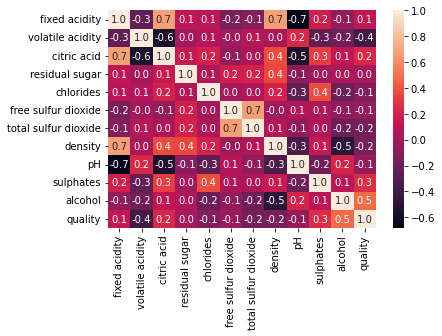

In [7]:
print('Visualization of Correlation between Variables : ')

sns.heatmap(wine_df.corr(),annot=True,fmt='.1f',annot_kws={'size':10})

Checking the relation between quality and alcohol : 


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

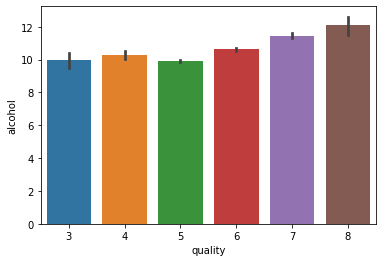

In [8]:
print('Checking the relation between quality and alcohol : ')

sns.barplot(x ='quality', data =wine_df, y ='alcohol')

Checking the relation between quality and volatile acidity : 


<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

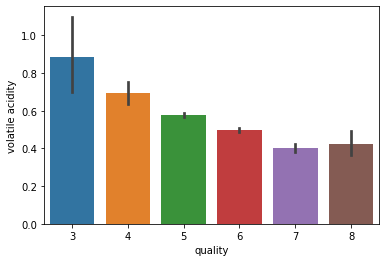

In [9]:
print('Checking the relation between quality and volatile acidity : ')

sns.barplot(x='quality',data=wine_df,y='volatile acidity')

Checking the relation between quality and sulphates : 


<AxesSubplot:xlabel='quality', ylabel='sulphates'>

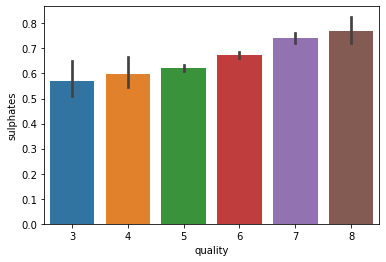

In [10]:
print('Checking the relation between quality and sulphates : ')

sns.barplot(x='quality',data=wine_df,y='sulphates')

Classes in quality are : 


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

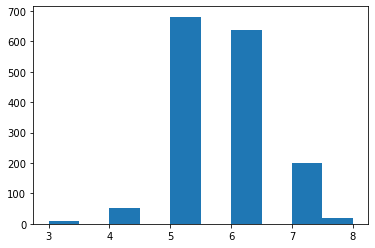

In [11]:
print('Classes in quality are : ')

plt.hist(wine_df['quality'])

 As there are only 6 class in quality we can assume that class 0-5 as bad quality and class 6-8 as good quality.

In [12]:
wine_df['quality'] = wine_df['quality'].apply(lambda x : 1 if x > 5 else 0)

print('Updated class of quality : ')

wine_df['quality'].head(2)

Updated class of quality : 


0    0
1    0
Name: quality, dtype: int64

# Next step in EDA is to check for the outliers in each variables and if outliers are present remove it from the variables.

Outliers in fixed acidity 


<AxesSubplot:>

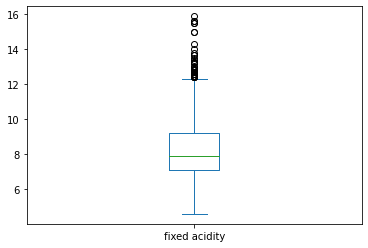

In [13]:
print('Outliers in fixed acidity ')

wine_df['fixed acidity'].plot(kind = 'box')

In [14]:
#creating functn to detect for outliers
def check_outliers1(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[((df > (Q3 + 1.5*IQR)))]
    return outliers

def check_outliers2(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[((df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR)))]
    return outliers

In [15]:
#dropping the outliers wine_df['fixed acidity']

wine_df.drop(check_outliers1(wine_df['fixed acidity']).index,axis=0,inplace=True)

Outliers in volatile acidity 


<AxesSubplot:>

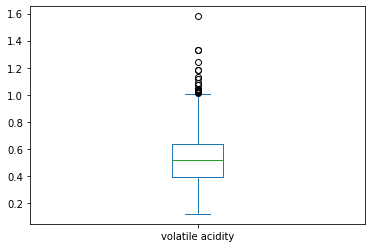

In [16]:
print('Outliers in volatile acidity ')

wine_df['volatile acidity'].plot(kind = 'box')

In [17]:
#dropping the outliers in wine_df['volatile acidity']

wine_df.drop(check_outliers1(wine_df['volatile acidity']).index,axis=0,inplace=True)

Outliers in citric acid 


<AxesSubplot:>

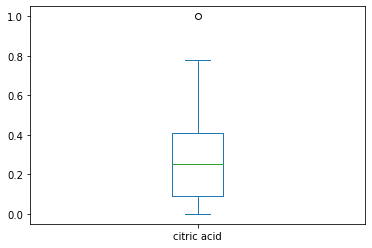

In [18]:
print('Outliers in citric acid ')

wine_df['citric acid'].plot(kind = 'box')

In [19]:
#dropping the outliers in wine_df['citric acid']

wine_df.drop(check_outliers1(wine_df['citric acid']).index,axis=0,inplace=True)

Outliers in residual sugar 


<AxesSubplot:>

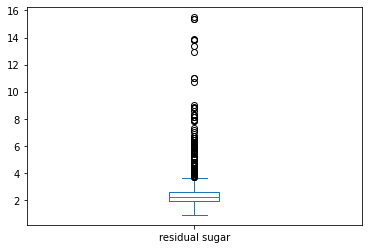

In [20]:
print('Outliers in residual sugar ')

wine_df['residual sugar'].plot(kind = 'box')

In [21]:
#dropping the outliers in wine_df['residual sugar']

wine_df.drop(check_outliers1(wine_df['residual sugar']).index,axis=0,inplace=True)

Outliers in chlorides 


<AxesSubplot:>

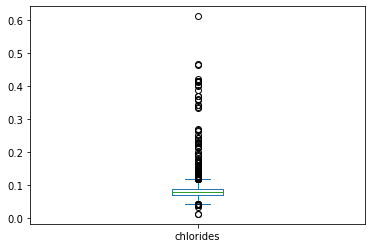

In [22]:
print('Outliers in chlorides ')

wine_df['chlorides'].plot(kind = 'box')

In [23]:
#dropping the outliers in wine_df['chlorides']

wine_df.drop(check_outliers2(wine_df['chlorides']).index,axis=0,inplace=True)

Outliers in free sulfur dioxide 


<AxesSubplot:>

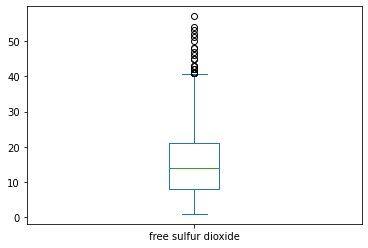

In [24]:
print('Outliers in free sulfur dioxide ')

wine_df['free sulfur dioxide'].plot(kind = 'box')

In [25]:
#dropping the outliers in wine_df['free sulfur dioxide']

wine_df.drop(check_outliers1(wine_df['free sulfur dioxide']).index,axis=0,inplace=True)

Outliers in total sulfur dioxide 


<AxesSubplot:>

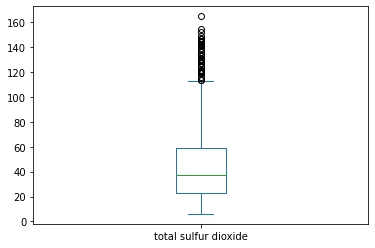

In [26]:
print('Outliers in total sulfur dioxide ')

wine_df['total sulfur dioxide'].plot(kind = 'box')

In [27]:
#dropping the outliers in wine_df['total sulfur dioxide']

wine_df.drop(check_outliers1(wine_df['total sulfur dioxide']).index,axis=0,inplace=True)

Outliers in density 


<AxesSubplot:>

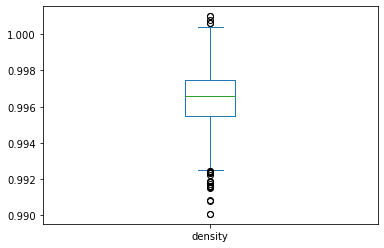

In [28]:
print('Outliers in density ')

wine_df['density'].plot(kind = 'box')

In [29]:
#dropping the outliers in wine_df['density']

wine_df.drop(check_outliers2(wine_df['density']).index,axis=0,inplace=True)

Outliers in pH 


<AxesSubplot:>

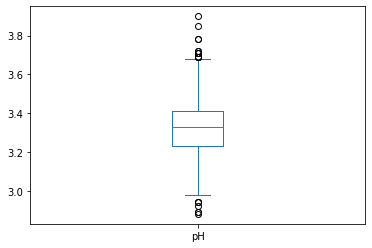

In [30]:
print('Outliers in pH ')

wine_df['pH'].plot(kind = 'box')

In [31]:
#dropping the outliers in wine_df['pH']

wine_df.drop(check_outliers2(wine_df['pH']).index,axis=0,inplace=True)

Outliers in sulphates 


<AxesSubplot:>

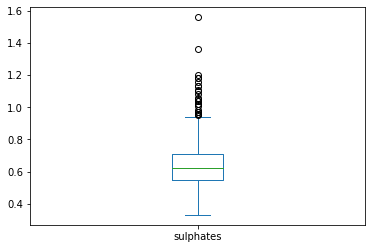

In [32]:
print('Outliers in sulphates ')

wine_df['sulphates'].plot(kind = 'box')

In [33]:
#dropping the outliers in wine_df['sulphates']

wine_df.drop(check_outliers1(wine_df['sulphates']).index,axis=0,inplace=True)

Outliers in alcohol


<AxesSubplot:>

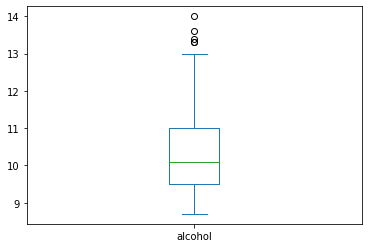

In [34]:
print('Outliers in alcohol')

wine_df['alcohol'].plot(kind = 'box')

In [35]:
#dropping the outliers in wine_df['alcohol']

wine_df.drop(check_outliers1(wine_df['alcohol']).index,axis=0,inplace=True)

# Step_4 : Extraction X (Independent Variable) and Y (Dependent Variable) varibles

In [36]:
X = wine_df.drop('quality',axis=1)
Y = wine_df['quality']

# Step_5 : Standaradizing the X variable

In [37]:
S = preprocessing.StandardScaler()
X = S.fit_transform(X)

# Step_6 : Splitting the Variables into training and testing sets

In [38]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=1)

# Step_7 : Train and predict the quality usinge different model

## First model we will use for predicting the quality of wine is : Logistic Classifier

In [39]:
LogReg = LogisticRegression()
LogReg.fit(Xtrain,Ytrain)

LogisticRegression()

In [40]:
Y_LogReg_Predicted = LogReg.predict(Xtest)
Y_LogReg_Predicted

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [41]:
Ytest.values

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [42]:
accuracy_of_LogReg = accuracy_score(Y_LogReg_Predicted,Ytest)
accuracy_of_LogReg

0.788546255506608

In [43]:
LogReg_PredictedProb = LogReg.predict_proba(Xtest)[:,1]
fpr,tpr,_ = roc_curve(Ytest,LogReg_PredictedProb)
LogReg_auc = auc(fpr,tpr)
LogReg_auc

0.84999214207135

Accuracy of Logistic Regression is : 0.788546255506608


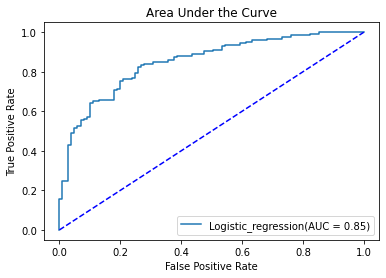

In [44]:
print(f'Accuracy of Logistic Regression is : {accuracy_of_LogReg}')

plt.plot(fpr,tpr,label ='Logistic_regression(AUC = %0.2f)'%LogReg_auc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area Under the Curve")
plt.legend()
plt.show()

Confusion Matrix for Logistic Classifier is  :  


<AxesSubplot:>

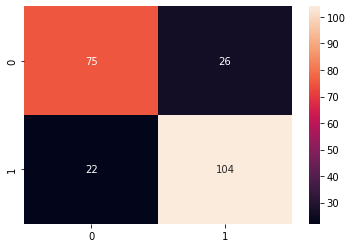

In [45]:
print('Confusion Matrix for Logistic Classifier is  :  ')
cm = confusion_matrix(Ytest,Y_LogReg_Predicted)
sns.heatmap(cm,annot=True,fmt='d')

## Second model we will use for predicting the quality of wine is : Decision Tree

In [46]:
dt_tree2 = DecisionTreeClassifier(random_state=1, max_depth=2, min_samples_split= 12)
dt_tree2.fit(Xtrain,Ytrain)
dt_tree2_train_score = dt_tree2.score(Xtrain,Ytrain)
dt_tree2_test_score = dt_tree2.score(Xtest,Ytest)

print(f'Training Score is : {dt_tree2_train_score}')
print(f'Testing Score is : {dt_tree2_test_score}')

Training Score is : 0.7224669603524229
Testing Score is : 0.7444933920704846


In [47]:
dt_tree3 = DecisionTreeClassifier(random_state=1, max_depth=3, min_samples_split= 12)
dt_tree3.fit(Xtrain,Ytrain)
dt_tree3_train_score = dt_tree3.score(Xtrain,Ytrain)
dt_tree3_test_score = dt_tree3.score(Xtest,Ytest)

print(f'Training Score is : {dt_tree3_train_score}')
print(f'Testing Score is : {dt_tree3_test_score}')

Training Score is : 0.7257709251101322
Testing Score is : 0.7577092511013216


In [48]:
dt_tree4 = DecisionTreeClassifier(random_state=1, max_depth=4,min_samples_split= 12)
dt_tree4.fit(Xtrain,Ytrain)
dt_tree4_train_score = dt_tree4.score(Xtrain,Ytrain)
dt_tree4_test_score = dt_tree4.score(Xtest,Ytest)

print(f'Training Score is : {dt_tree4_train_score}')
print(f'Testing Score is : {dt_tree4_test_score}')

Training Score is : 0.7544052863436124
Testing Score is : 0.7577092511013216


In [49]:
dt_tree6 = DecisionTreeClassifier(random_state=1, max_depth=6,min_samples_split= 12)
dt_tree6.fit(Xtrain,Ytrain)
dt_tree6_train_score = dt_tree6.score(Xtrain,Ytrain)
dt_tree6_test_score = dt_tree6.score(Xtest,Ytest)

print(f'Training Score is : {dt_tree6_train_score}')
print(f'Testing Score is : {dt_tree6_test_score}')

Training Score is : 0.8259911894273128
Testing Score is : 0.775330396475771


Decision Tree Graphically Visualization of dt_tree6 : 


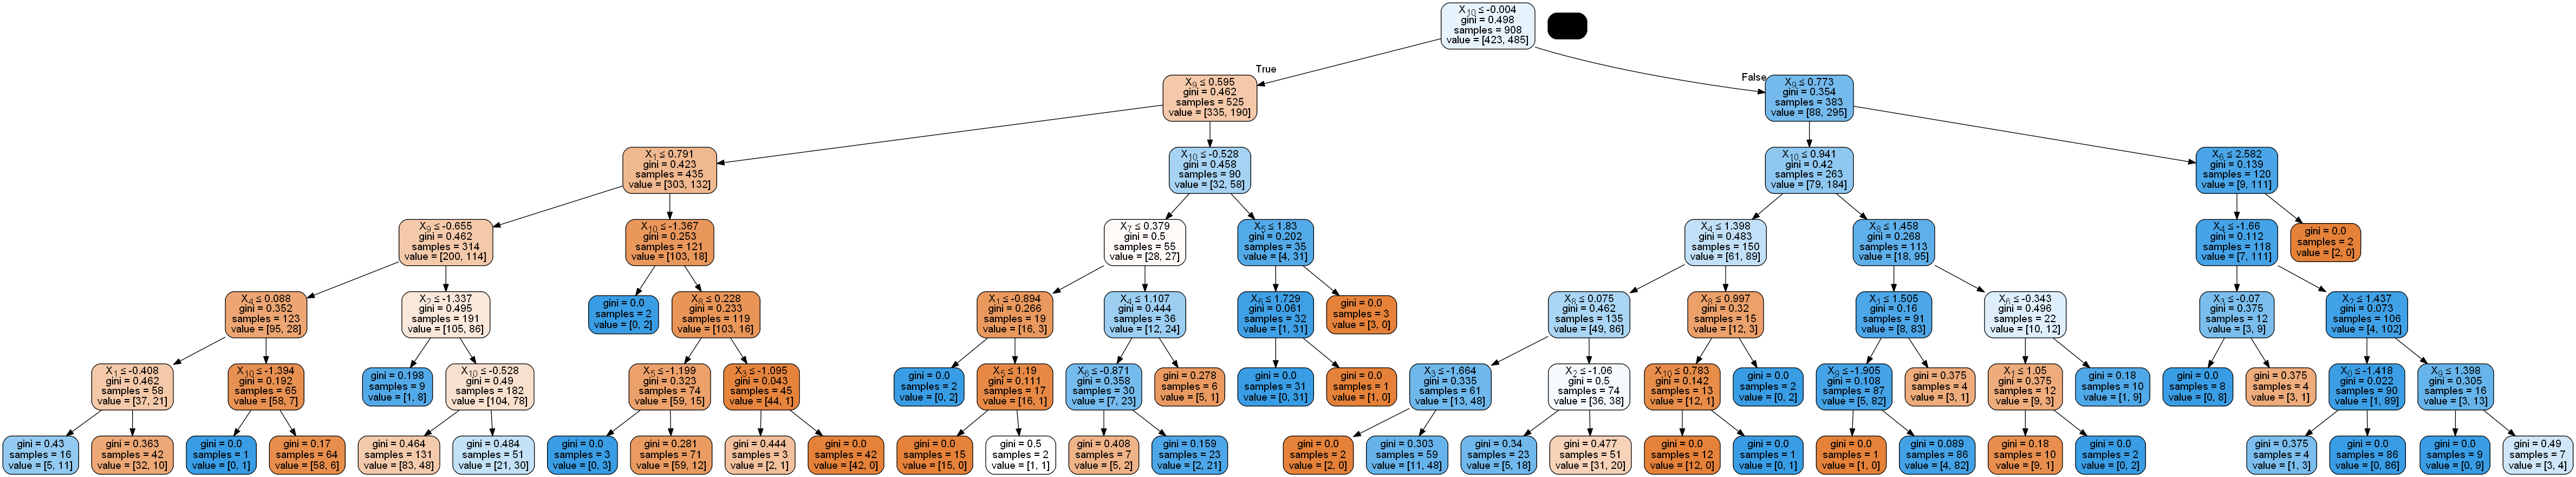

<Figure size 720x576 with 0 Axes>

In [50]:
print('Decision Tree Graphically Visualization of dt_tree6 : ')

from IPython.display import Image 
import pydotplus

plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(dt_tree6,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Decision Tree Graphically Visualization of dt_tree4 : 


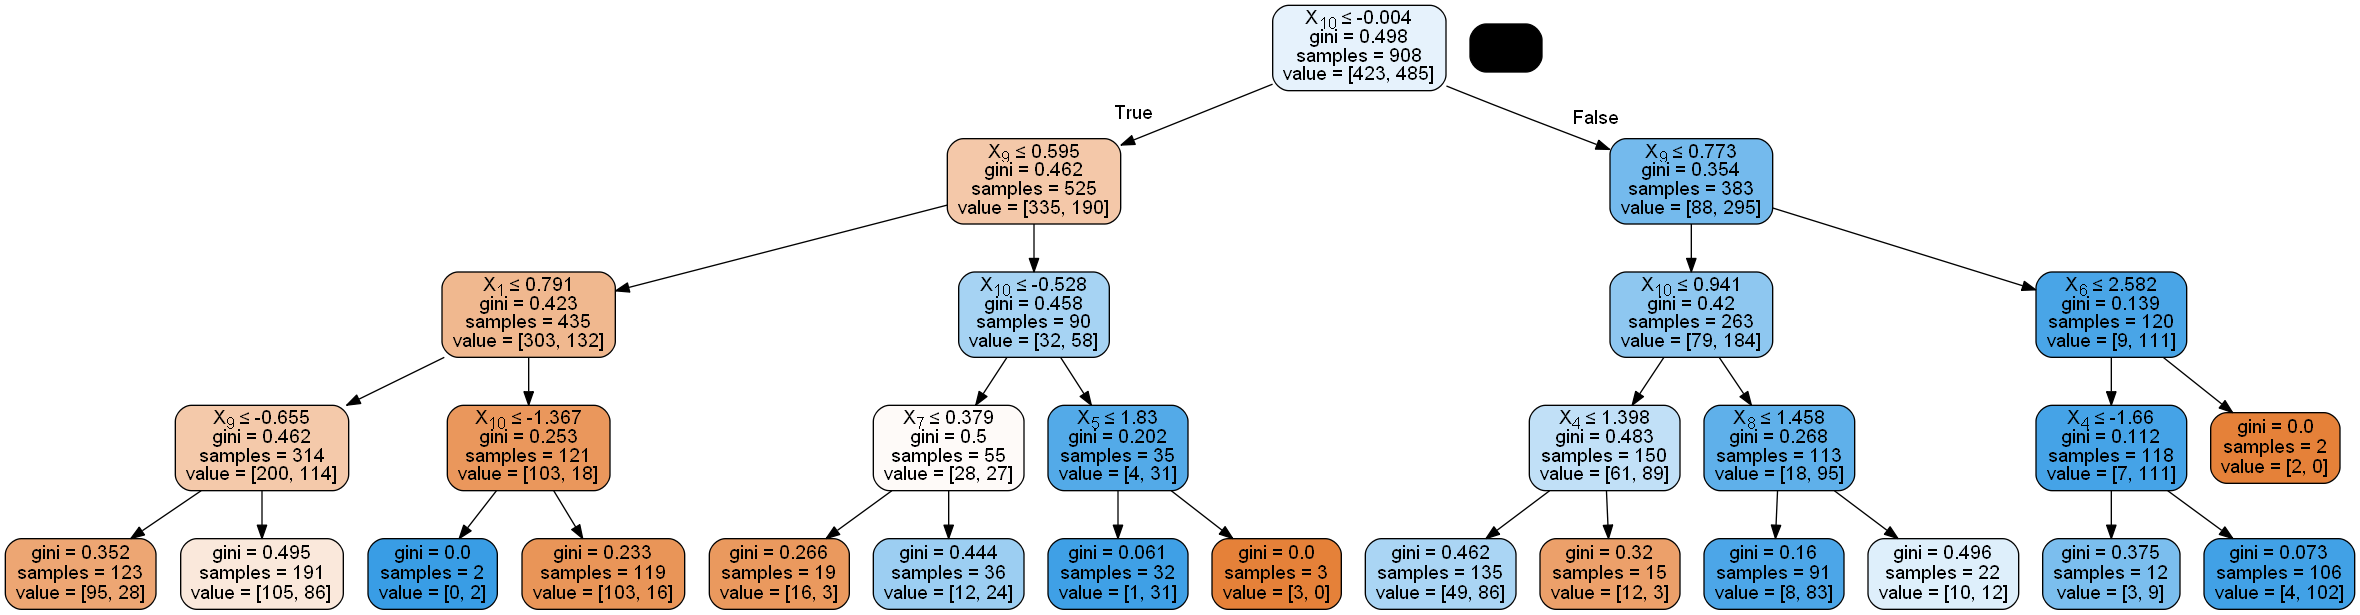

<Figure size 720x576 with 0 Axes>

In [51]:
print('Decision Tree Graphically Visualization of dt_tree4 : ')

from IPython.display import Image 
import pydotplus

plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(dt_tree4,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [52]:
dt_tree4_predicted = dt_tree4.predict(Xtest)
dt_tree4_predicted

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [53]:
dt_tree4_accuracy = accuracy_score(dt_tree4_predicted,Ytest)
dt_tree4_accuracy

0.7577092511013216

In [54]:
dt_tree4_predictedprob = dt_tree4.predict_proba(Xtest)[:,1]
fpr,tpr,_ = roc_curve(Ytest,dt_tree4_predictedprob)
dt_tree4_auc = auc(fpr,tpr)
dt_tree4_auc

0.8422520823510923

Accuracy of Decision_tree is : 0.7577092511013216


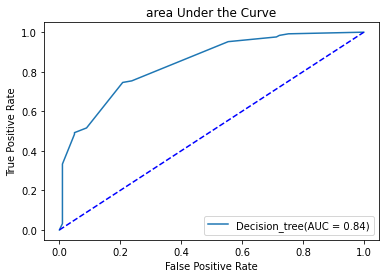

In [55]:
print(f'Accuracy of Decision_tree is : {dt_tree4_accuracy}')

plt.plot(fpr,tpr,label ='Decision_tree(AUC = %0.2f)'%dt_tree4_auc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
plt.legend()
plt.show()

## Third model we will use for predicting the quality of wine is : Random Forest (Boosting Classifier)

In [56]:
clf = AdaBoostClassifier(random_state=23, n_estimators= 500, learning_rate=0.01)
clf.fit(Xtrain,Ytrain)

AdaBoostClassifier(learning_rate=0.01, n_estimators=500, random_state=23)

In [57]:
clf_train_score = clf.score(Xtrain,Ytrain)
clf_test_score = clf.score(Xtest,Ytest)

print(f'Training Score is : {clf_train_score}')
print(f'Testing Score is : {clf_test_score}')

Training Score is : 0.7477973568281938
Testing Score is : 0.7841409691629956


In [58]:
clf_predicted = clf.predict(Xtest)
clf_predicted

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [59]:
clf_predictedprob = clf.predict_proba(Xtest)[:,1]
fpr,tpr,_ = roc_curve(Ytest,clf_predictedprob)
clf_auc = auc(fpr,tpr)
clf_auc

0.862997013987113

In [60]:
clf_accuracy = accuracy_score(clf_predicted,Ytest)
clf_accuracy

0.7841409691629956

Accuracy of Boosting Classifier is : 0.7841409691629956


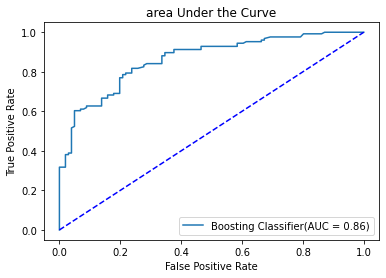

In [61]:
print(f'Accuracy of Boosting Classifier is : {clf_accuracy}')

plt.plot(fpr,tpr,label ='Boosting Classifier(AUC = %0.2f)'%clf_auc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
plt.legend()
plt.show()

# Classification Report of Logistic Regression , Decision Tree, Boosting Clsssifier

In [62]:
print('1. Classification Report of Logistic Regression \n')
print(classification_report(Ytest,Y_LogReg_Predicted))

1. Classification Report of Logistic Regression 

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       101
           1       0.80      0.83      0.81       126

    accuracy                           0.79       227
   macro avg       0.79      0.78      0.79       227
weighted avg       0.79      0.79      0.79       227



In [63]:
print('2. Classification Report for Decision Tree \n')
print(classification_report(Ytest,dt_tree4_predicted))

2. Classification Report for Decision Tree 

              precision    recall  f1-score   support

           0       0.71      0.76      0.74       101
           1       0.80      0.75      0.78       126

    accuracy                           0.76       227
   macro avg       0.76      0.76      0.76       227
weighted avg       0.76      0.76      0.76       227



In [64]:
print('3. Classification Report for Boosting Classifier \n')
print(classification_report(Ytest,clf_predicted))

3. Classification Report for Boosting Classifier 

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       101
           1       0.81      0.79      0.80       126

    accuracy                           0.78       227
   macro avg       0.78      0.78      0.78       227
weighted avg       0.78      0.78      0.78       227

